In [43]:
import numpy as np
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


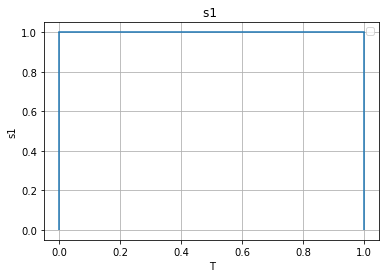

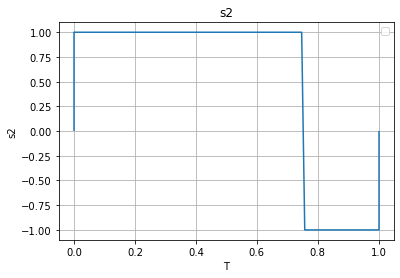

In [44]:
#initializeing both signals, s1 and s2, 
#The plots show the values of s1 and s2 against the time T.

size= 100 #size represents the size of the signals and determines the number of samples in the signals s1 and s2.
T= np.linspace(0, 1, size)#T is an array of size size represents the time axis values for the signals. 
#input signal1
s1= np.ones(size)#s1 is an array of size size representing the first input signal .
#Plotting input signal 1
plt.figure(1)
plt.plot(T,s1)
plt.vlines(x=0,ymin=0, ymax=1)
plt.vlines(x=1,ymin=0, ymax=1)
plt.grid(True)
plt.title('s1 ')
plt.xlabel("T")
plt.ylabel("s1")
plt.legend()

#input signal2
s2= np.zeros(size)#s2 is an array of size size representing the second input signal .
s2[0:75]=1
s2[75:size]=-1
#Plotting input signal 2
plt.figure(2)
plt.plot(T,s2)
plt.vlines(x=0,ymin=0, ymax=1)
plt.vlines(x=1,ymin=-1, ymax=0)
plt.grid(True)
plt.title('s2')
plt.xlabel("T")
plt.ylabel("s2")
plt.legend()



In [45]:
#req1.1
#GM_Bases performs Gram-Schmidt Orthogonalization on two input signals s1 and s2. 
#It calculates the energy and normalized basis vectors phi1 and phi2.
def GM_Bases(s1,s2):

    E1= abs(s1)**2# E1 represents the energy of s1,In other words, it calculates the magnitude squared of each element in signal1.
    phi1= s1/np.sqrt(E1)#phi1 is an array of size size representing the first basis vector obtained through Gram-Schmidt Orthogonalization.
    s21 = np.sum(s2*phi1)/ size# It represents the projection coefficient of s2 onto the first basis vector phi1. It is calculated by taking the dot product between s2 and phi1 and dividing it by the size of the signal size
    g2=s2- s21* phi1#g2 represents the residual signal obtained after subtracting the projection of s2 onto phi1 from s2 .
    E2 = np.sum(g2**2)/size#E2 represents the energy of g2.
    phi2= g2/np.sqrt(E2)#phi2: It is an array of size size representing the second basis vector obtained through Gram-Schmidt Orthogonalization

    return phi1,phi2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


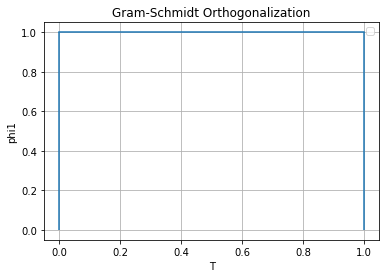

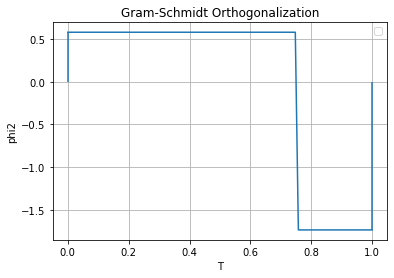

In [46]:
#req 1.4->1)

#applying the GM_Bases function to the signals s1 and s2 
#to obtain the orthogonal basis vectors phi1 and phi2. 
#It then plots the values of phi1 and phi2 against T.
phi1,phi2=GM_Bases(s1,s2)

plt.figure(1)
plt.plot(T,phi1)
plt.vlines(x=0,ymin=0, ymax=1)
plt.vlines(x=1,ymin=0, ymax=1)
plt.grid(True)
plt.title('Gram-Schmidt Orthogonalization')
plt.xlabel("Time")
plt.ylabel("phi1")
plt.legend()

plt.figure(2)
plt.plot(T,phi2)
plt.vlines(x=0,ymin=0, ymax=phi2[0])
plt.vlines(x=1,ymin=phi2[size-1], ymax=0)
plt.title('Gram-Schmidt Orthogonalization')
plt.xlabel("Time")
plt.ylabel("phi2")
plt.legend()


plt.grid(True)


In [47]:
#req1.2
#function signal_space calculates the projections of a signal s onto the basis vectors phi1 and phi2.
def signal_space(s, phi1,phi2):
    v1=np.sum(s*phi1)/ size# v1 represents the projection of a given signal s onto the first basis vector phi1
    v2=np.sum(s*phi2)/ size# v2 represents the projection of a given signal s onto the second basis vector phi2
    return v1,v2 



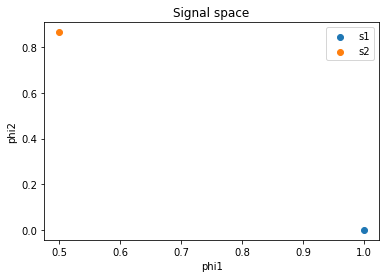

In [48]:
#req1.4->2)
#applying the signal_space function to the signals s1 and s2 
#with the basis vectors phi1 and phi2 to obtain the projection values.
#then creating a scatter plot of the projection values, where each point represents a signal.

v1_s1,v2_s1 = signal_space(s1, phi1,phi2)#v1_s1 represents the projection of the signal s1 onto the first basis vector phi1, v2_s1 represents the projection of the signal s1 onto the second basis vector phi2 .
v1_s2,v2_s2 = signal_space(s2, phi1,phi2)#v1_s2 represents the projection of the signal s2 onto the first basis vector phi1, v2_s2 represents the projection of the signal s2 onto the second basis vector phi2 .

plt.scatter(v1_s1,v2_s1, label='s1')
plt.scatter(v1_s2,v2_s2 , label='s2')
plt.title('Signal space')
plt.xlabel("phi1")
plt.ylabel("phi2")
plt.legend()

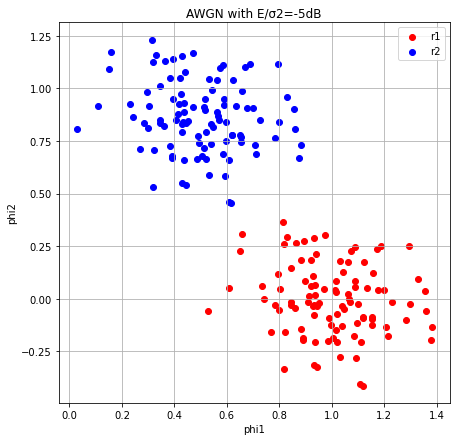

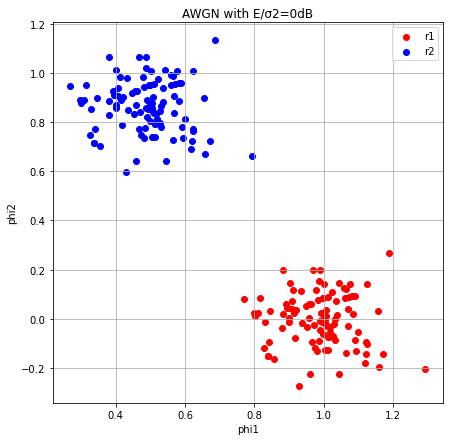

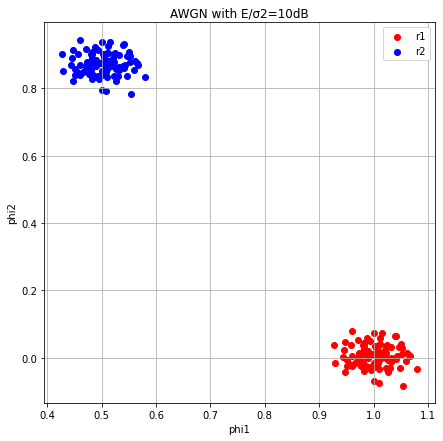

In [49]:
#req1.4->3)
#adding Additive White Gaussian Noise (AWGN) to the signals s1 and s2 
#with different signal-to-noise ratios (SNR).
#Each scatter plot represents the projections of the noisy signals.
E_σ2=[-5,0,10]#E_σ2 is a list of values representing different Signal-to-Noise Ratio (SNR) levels: [-5, 0, 10]. These values are used to generate AWGN with different levels of noise.

for i, SNR_db in enumerate(E_σ2):
    plt.figure(i,figsize=[7,7])
    plt.grid(True)
    plt.title('AWGN with E/σ2='+str(SNR_db)+'dB')
    plt.xlabel("phi1")
    plt.ylabel("phi2")
    for j in range(100): 
        # σ represents the standard deviation of the AWGN
        σ=1/(10**(SNR_db/10)) 

        w=np.random.normal(0,np.sqrt(σ),size)#w is an array of size size representing the AWGN samples
        r1= s1+w#r1 is an array of size size representing the signal s1 with added AWGN
        r2= s2+w#r2 is an array of size size representing the signal s2 with added AWGN

        v1_s1_AWGN,v2_s1_AWGN = signal_space(r1, phi1,phi2)#v1_s1_AWGN represents the projection of the noisy signal r1 onto the first basis vector phi1 , v2_s1_AWGN represents the projection of the noisy signal r1 onto the second basis vector phi2.
        v1_s2_AWGN,v2_s2_AWGN = signal_space(r2, phi1,phi2)#v1_s2_AWGN represents the projection of the noisy signal r2 onto the first basis vector phi1 , v2_s2_AWGN represents the projection of the noisy signal r2 onto the second basis vector phi2.

        plt.scatter(v1_s1_AWGN,v2_s1_AWGN,c='r')
        plt.scatter(v1_s2_AWGN,v2_s2_AWGN,c='b')
    plt.legend(["r1","r2"])

